### Problem Statements
1. Pre-process and clean the dataset
2. Find out the best model to our dataset
3. Predict the home price based on ML model

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeRegressor

### Load data

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# Data Cleaning and Preprocessing

In [4]:
df = df.drop(["area_type","availability","society","balcony"], axis=1)

In [5]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df.shape

(13320, 5)

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df["bhk"] = df["size"].apply(lambda x: int(x.split(' ')[0]))

In [11]:
df = df.drop(["size"], axis=1)

In [12]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def convert_range_to_avg(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [14]:
convert_range_to_avg('3g3')

In [15]:
df["total_sqft"] = df["total_sqft"].apply(convert_range_to_avg)

In [16]:
df.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [17]:
df["price_per_square"] = df["price"]* 100000 / df["total_sqft"]

In [18]:
df.isnull().sum()

location             0
total_sqft          46
bath                 0
price                0
bhk                  0
price_per_square    46
dtype: int64

In [19]:
lens =df.total_sqft.unique()

In [20]:
df.shape

(13246, 6)

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

location            0
total_sqft          0
bath                0
price               0
bhk                 0
price_per_square    0
dtype: int64

In [23]:
df.shape

(13200, 6)

In [24]:
len(df.location.unique())

1298

In [25]:
df["location"].value_counts()

Whitefield                    532
Sarjapur  Road                392
Electronic City               302
Kanakpura Road                264
Thanisandra                   232
                             ... 
Rajarajesheari nagar            1
Bandepalya                      1
Kanakapura main  Road           1
Attiguppe                       1
BTM Layout 1stage 9th Main      1
Name: location, Length: 1298, dtype: int64

In [26]:
df["location"] = df["location"].apply(lambda x : x.strip())

In [27]:
df["location"].value_counts()

Whitefield                    533
Sarjapur  Road                392
Electronic City               304
Kanakpura Road                264
Thanisandra                   235
                             ... 
GB Palya                        1
BDS Layout                      1
BAGUR                           1
Vinayaka Layout                 1
BTM Layout 1stage 9th Main      1
Name: location, Length: 1287, dtype: int64

In [28]:
location_agg  = df.groupby("location")["location"].agg("count").sort_values(ascending=False)

In [29]:
location_agg

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [30]:
len(location_agg[location_agg<=10])

1047

In [31]:
location_less_than_ten = location_agg[location_agg<=10]

In [32]:
location_less_than_ten

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [33]:
location_less_than_ten.unique()

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [34]:
df["location"] = df["location"].apply(lambda x: "other" if x in location_less_than_ten else x)

In [35]:
len(df["location"].unique())

241

In [36]:
lem =df[df["location"] == "other"]

In [37]:
 df

,location,total_sqft,bath,price,bhk,price_per_square
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,other,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


# The price of per square feet should be more than 300

In [38]:
df =df[~(df["total_sqft"]/ df["bhk"] <300)]

In [39]:
df.shape

(12456, 6)

In [40]:
df.price_per_square.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_square, dtype: float64

# Remove outliers of price per square that did not fullfil the requirement like that contain below 300.

In [41]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, location_df in df.groupby('location'):
        m = np.mean(location_df.price_per_square)
        std = np.std(location_df.price_per_square)
        reduced_df = location_df[((location_df.price_per_square)>(m-std)) & ((location_df.price_per_square)<(m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out   
        
        
    

In [42]:
df = remove_pps_outlier(df)

In [43]:
df.shape

(10242, 6)

# Find out the price of 3 bhk is less than the price of 2 bhk in the same place. It considers as outlier and remove this outlier.

In [44]:
def scatter_plot(df, location):
    bhk2 = df[(df.location == location) & (df.bhk==2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.scatter(bhk2.total_sqft , bhk2.price, color="red", s=50, label="bhk2")
    plt.scatter(bhk3.total_sqft, bhk3.price, color="navy", marker="*", s=50, label="bhk3")
    plt.xlabel("total_sqft")
    plt.ylabel("price")
    plt.legend()

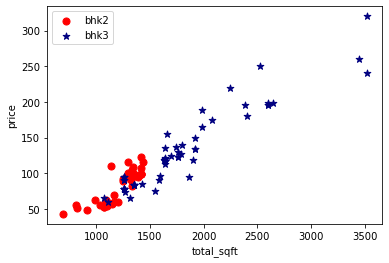

In [45]:
scatter_plot(df, "Hebbal")

In [46]:
def remove_outlier(df,location):
    exclude_indics = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("bhk"):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_square),
                "std" : np.mean(bhk_df.price_per_square),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indics = np.append(exclude_indics, bhk_df[bhk_df.price_per_square < (stats["mean"])].index.values)
    return df.drop(exclude_indics, axis='index') 

In [47]:
df = remove_outlier(df,"Hebbal" )

In [48]:
df.shape

(7317, 6)

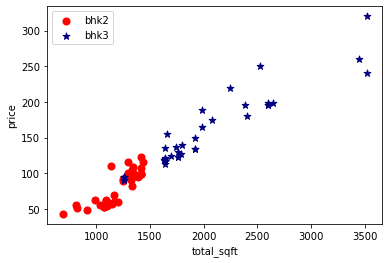

In [49]:
scatter_plot(df,"Hebbal")

# Find out the the number of bath which is more than 10 and compare it to bhk .If it look like unusual then it will consider as outlier and remove it.

In [50]:
df.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [51]:
df = df[df.bath <10]

In [52]:
df.shape

(7312, 6)

In [53]:
df

,location,total_sqft,bath,price,bhk,price_per_square
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2,5833.333333
10234,other,1800.0,1.0,200.0,1,11111.111111
10237,other,1353.0,2.0,110.0,2,8130.081301
10238,other,812.0,1.0,26.0,1,3201.970443


# Text values convert into numaric values

In [54]:
df = pd.get_dummies(df, drop_first=True)

In [55]:
df

,total_sqft,bath,price,bhk,price_per_square,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,2850.0,4.0,428.0,4,15017.543860,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,11901.840491,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,12533.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,10833.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,11983.805668,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1200.0,2.0,70.0,2,5833.333333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10234,1800.0,1.0,200.0,1,11111.111111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,1353.0,2.0,110.0,2,8130.081301,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,812.0,1.0,26.0,1,3201.970443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
df = df.drop(["price_per_square"], axis=1)

In [57]:
df = df.drop(["location_other"], axis=1)

In [58]:
df

,total_sqft,bath,price,bhk,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Apply LinearRegression ,LassoRegression and DecisionTreeRegression and find out the best model.

In [63]:
x = df.drop(["price"], axis=1)
y = df["price"]

In [64]:
cv = ShuffleSplit(n_splits=5,
    test_size=0.2,
    random_state=0)

In [65]:
models = {
    'linearRegression':{
    'model':LinearRegression(),
    'params':{
        "normalize":[True,False]
        
    }
    },
    'lasso':{
    'model': Lasso(),
    'params':{
        'alpha':[1,2,3],
        'max_iter':[10,100,1000],
        'selection' : ['cyclic', 'random'],
        'positive':[True, False]
        
    }
    },
    'decisiontree' :{
    'model': DecisionTreeRegressor(),
    'params':{
        'criterion' : ["mse", "friedman_mse"],
        'splitter' : ["best", "random"]
        
    }
    }
}

In [66]:
scores= []
for model_name , mp in models.items():
    GR = GridSearchCV(mp['model'], mp['params'],cv=cv)
    GR.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score' : GR.best_score_,
        'best_param' :GR.best_params_
        
    })
    

 

C:\Users\Binu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Binu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Binu\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 569, in fit
    linalg.lstsq(X, y)
  File "C:\Users\Binu\anaconda3\lib\site-packages\scipy\linalg\basic.py", line 1207, in lstsq
    raise LinAlgError("SVD did not converge in Linear Least Squares")
numpy.linalg.LinAlgError: SVD did not converge in Linear Least Squares

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Binu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan

In [67]:
pd.DataFrame(scores, columns=['model',"best_score","best_param"])

,model,best_score,best_param
0,linearRegression,0.856895,{'normalize': False}
1,lasso,0.688489,"{'alpha': 1, 'max_iter': 100, 'positive': Fals..."
2,decisiontree,0.734605,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Linear Regression is the best model for our dataset. So we will apply this machine learning algorithm individually to predict the prices of home according to others features.

In [68]:
lr = GridSearchCV(LinearRegression(),{
     "normalize":[True,False]
},cv=cv)
lr.fit(x,y)

C:\Users\Binu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Binu\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Binu\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 569, in fit
    linalg.lstsq(X, y)
  File "C:\Users\Binu\anaconda3\lib\site-packages\scipy\linalg\basic.py", line 1207, in lstsq
    raise LinAlgError("SVD did not converge in Linear Least Squares")
numpy.linalg.LinAlgError: SVD did not converge in Linear Least Squares

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Binu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.2, train_size=None),
             estimator=LinearRegression(),
             param_grid={'normalize': [True, False]})

In [69]:
lr.score(x,y)

0.8620202930445371

In [70]:
x.columns

Index(['total_sqft', 'bath', 'bhk', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi',
       'location_5th Block Hbr Layout', 'location_5th Phase JP Nagar',
       'location_6th Phase JP Nagar', 'location_7th Phase JP Nagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=242)

# Predict Home price

In [71]:
def predict_Price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    z = np.zeros(len(x.columns))
    z[0]= sqft
    z[1]=bath
    z[2]= bhk
    if loc_index>= 0:
        z[loc_index]= 1
        
    return lr.predict([z])[0]
    

In [72]:
predict_Price("location_Yelenahalli",1000,2,2)

27.82827848295468

In [73]:
predict_Price("location_Yelenahalli",1000,2,3)

25.94930277429861

# Save model as pickle and save columns as json

In [ ]:
import pickle
with open("price_prediction.pickle",'wb') as f:
    pickle.dump(lr,f)

In [ ]:
import json
columns = {
    "all_columns" : [cols.lower() for cols in x.columns]
}
with open('All_Columns.json','w') as f:
    f.write(json.dumps(columns))